In [43]:
import warnings
import pdb
import os
import re
import sys
import imp
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import functools
from functools import reduce
from collections import Counter
import pyarrow as pa
import pyarrow.parquet as pq
from collections import Counter
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import umap
reducer = umap.UMAP()
import matplotlib.cm as cm

import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# to work with anndata
import anndata
import scanpy as sc


In [35]:
sys.path.append(os.path.dirname(os.getcwd()))
from baselines.baselines_helpers import scale, convert_to_ann
from visualisation_and_evaluation.helpers_vizualisation import plot_tsne, plot_umap

In [12]:
wd = os.getcwd()
wd = os.path.abspath(os.path.join(wd,"..","..","data"))

In [ ]:
#################   simulated data   ###############

In [ ]:
######  all cell populations shared  ######

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'sample' as categorical
... storing 'batch' as categorical
... storing 'cell_type' as categorical


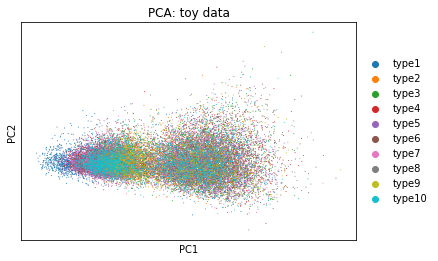

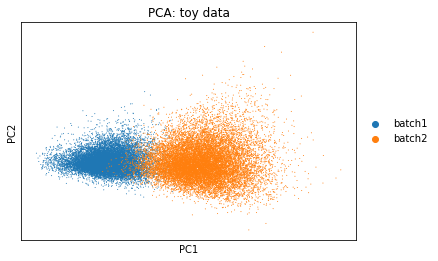

In [31]:
data_path = wd+'/simulated/'
df_sim = pd.read_parquet(data_path+'toy_data_gamma_w_index.parquet')
adata_sim = convert_to_ann(df_sim)

# dim reduction
sc.tl.pca(adata_sim)
# plots
sc.pl.pca(adata_sim, color='cell_type', title='PCA: toy data', return_fig=True)
plt.savefig(data_path+'/plots/pca_sim_celltypes.png', dpi=300, bbox_inches='tight')
sc.pl.pca(adata_sim, color='batch', title='PCA: toy data', return_fig=True)
plt.savefig(data_path+'/plots/pca_sim_batches.png', dpi=300, bbox_inches='tight')


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'sample' as categorical
... storing 'batch' as categorical
... storing 'cell_type' as categorical


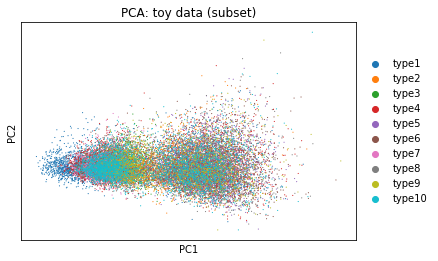

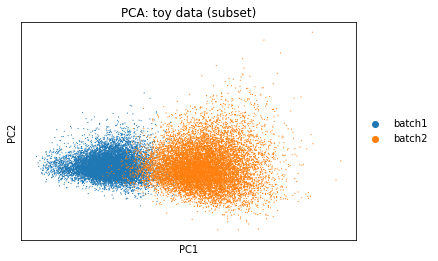

In [32]:
######  some cell populations shared  ######
data_path = wd+'/simulated/'
df_sim = pd.read_parquet(data_path+'toy_data_gamma_w_index_subset.parquet')
adata_sim = convert_to_ann(df_sim)

# dim reduction
sc.tl.pca(adata_sim)
# plots
sc.pl.pca(adata_sim, color='cell_type', title='PCA: toy data (subset)', return_fig=True)
plt.savefig(data_path+'/plots/pca_sim_subset_celltypes.png', dpi=300, bbox_inches='tight')
sc.pl.pca(adata_sim, color='batch', title='PCA: toy data (subset)', return_fig=True)
plt.savefig(data_path+'/plots/pca_sim_subset_batches.png', dpi=300, bbox_inches='tight')


In [ ]:
####################  Chevrier data  ###################

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'sample' as categorical
... storing 'batch' as categorical
... storing 'cell_type' as categorical


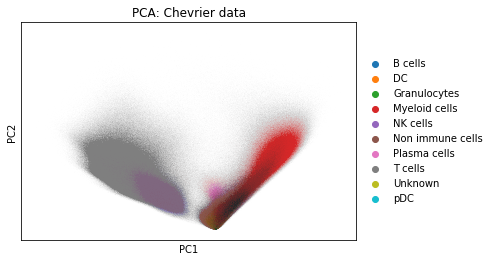

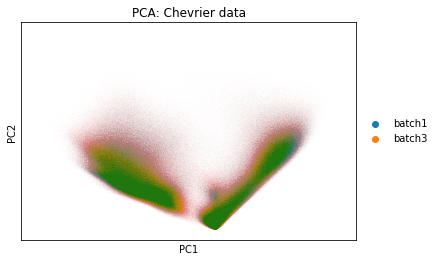

In [33]:
data_path = wd+'/Dataset5/'
df_full = pd.read_parquet(data_path+'chevrier_data_pooled_full_panels.parquet')
df_full = df_full.dropna(axis=1)
adata_full = convert_to_ann(df_full)

# dim reduction
sc.tl.pca(adata_full)
# plots
sc.pl.pca(adata_full, color='cell_type', title='PCA: Chevrier data', return_fig=True)
plt.savefig(data_path+'/plots/pca_full_celltypes.png', dpi=300, bbox_inches='tight')
sc.pl.pca(adata_full, color='batch', title='PCA: Chevrier data', return_fig=True)
plt.savefig(data_path+'/plots/pca_full_batches.png', dpi=300, bbox_inches='tight')


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


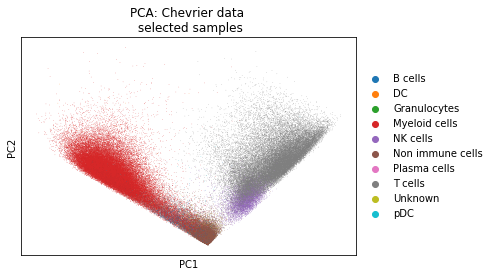

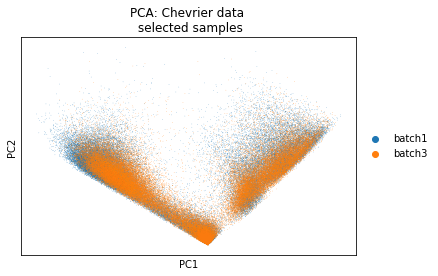

In [34]:
### only selected samples
samples_selected = ['sample5','sample75','sample65']
adata_selected = adata_full[adata_full.obs['sample'].isin(samples_selected),:].copy()
# dim reduction
sc.tl.pca(adata_selected)
# plots
sc.pl.pca(adata_selected, color='cell_type', title='PCA: Chevrier data \n selected samples', return_fig=True)
plt.savefig(data_path+'/plots/pca_full_selected_celltypes.png', dpi=300, bbox_inches='tight')
sc.pl.pca(adata_selected, color='batch', title='PCA: Chevrier data \n selected samples', return_fig=True)
plt.savefig(data_path+'/plots/pca_full_selected_batches.png', dpi=300, bbox_inches='tight')


In [ ]:
# sc.tl.tsne(adata_selected)
# sc.pl.tsne(adata_selected, color='cell-type', title='tSNE: Chevrier data \n selected samples')
# sc.pl.tsne(adata_selected, color='batch', title='tSNE: Chevrier data \n selected samples')


In [49]:
########## alternative plotting functions ############
def plot_tsne(data, do_pca=True, n_plots=2, iter_=500, pca_components=20, save_as=None, folder_name='figures'):
    ''' 
    Function to generate t-sne plot 
    inputs: 
        data: cell x markers: has the labels as index!! eg. Data23_Panel1_tx_NR4_Patient9
        do_pca: performs pca prior to t-sne, no downsampling there
        n_plots: Tries different perplexity values, 
        iter_ : fitting 
        pca_components: PCs
    '''
    Labels = list(data.index)
    if do_pca: 
        pca = PCA(n_components=pca_components)
        data = pca.fit_transform(data)
    for i in range(n_plots):
        perplexity_ = 10* (i + 1)
        tsne = TSNE(n_components=2,verbose=1,perplexity=perplexity_,n_iter=iter_)
        X_tsne = tsne.fit_transform(data)
        Xf = pd.DataFrame(X_tsne)
        Xf.columns = ["t-sne1", "t-sne2"]
        Xf['labels'] = Labels
        tsne_plot = sns.lmplot("t-sne1", "t-sne2",hue="labels",data=Xf, fit_reg=False, scatter_kws={'alpha': 0.1})
        plt.title('Plot: t-SNE projection of the dataset perplexity = {}, iter = {}'.format(perplexity_, iter_), fontsize=15)
        if save_as is not None:
            plt.savefig(os.path.join(folder_name, save_as+'_p'+str(perplexity_)))
            plt.close()
        else:
            #plt.show()
            tsne_plot

def scale(x):
    p99 = np.percentile(x,99)
    x[x>p99] = p99
    x = (x - np.min(x)) / (np.max(x) - np.min(x))
    return(x)

def prep_for_tsne(data, max_cells=2000, random_state=345, split_by='celltype'):
    df = data.copy()
    np.random.seed(random_state)
    df['metadata_number'] = range(df.shape[0])
    selected_cells = df.loc[:,['metadata_'+split_by,'metadata_number']].groupby('metadata_'+split_by,group_keys=False).apply(lambda x: x.sample(min(len(x),max_cells)))
    df = df.iloc[selected_cells['metadata_number'],:]
    df = df.loc[:,~df.columns.str.startswith('metadata')]
    if(split_by=='celltype'):
        cts = [x.split('_')[-1].split(split_by)[-1] for x in list(df.index)]
    elif(split_by=='batch'):
        cts = [x.split('_')[0] for x in list(df.index)]
    df.index = cts
    df = df.apply(lambda x: scale(x), axis=0)
    return(df)


(1586418, 94)
(18000, 35)
(1830229, 94)
(15867, 27)
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 18000 samples in 0.011s...
[t-SNE] Computed neighbors for 18000 samples in 2.997s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18000
[t-SNE] Computed conditional probabilities for sample 2000 / 18000
[t-SNE] Computed conditional probabilities for sample 3000 / 18000
[t-SNE] Computed conditional probabilities for sample 4000 / 18000
[t-SNE] Computed conditional probabilities for sample 5000 / 18000
[t-SNE] Computed conditional probabilities for sample 6000 / 18000
[t-SNE] Computed conditional probabilities for sample 7000 / 18000
[t-SNE] Computed conditional probabilities for sample 8000 / 18000
[t-SNE] Computed conditional probabilities for sample 9000 / 18000
[t-SNE] Computed conditional probabilities for sample 10000 / 18000
[t-SNE] Computed conditional probabilities for sample 11000 / 18000
[t-SNE] Computed conditional probabilities for sample 12000 / 1800

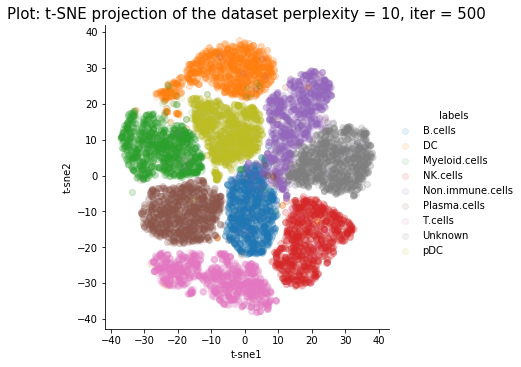

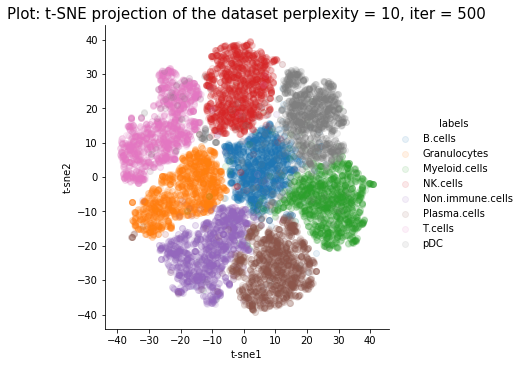

In [45]:
data_path = wd+'/Dataset5/'
df_full = pd.read_parquet(data_path+'chevrier_data_pooled_full_panels.parquet')

tam_df = df_full.loc[df_full['metadata_panel']=='tam_panel',:]
print(tam_df.shape)
tam_df = tam_df.dropna(axis=1)
tam_df = prep_for_tsne(tam_df)
print(tam_df.shape)

tcell_df = df_full.loc[df_full['metadata_panel']=='tcell_panel',:]
print(tcell_df.shape)
tcell_df = tcell_df.dropna(axis=1)
tcell_df = prep_for_tsne(tcell_df)
print(tcell_df.shape)

plot_tsne(tam_df, n_plots=1)
plt.savefig(data_path+'/plots/tsne_tam_panel_full_celltypes.png', bbox_inches='tight')
plot_tsne(tcell_df, n_plots=1)
plt.savefig(data_path+'/plots/tsne_tcell_panel_full_celltypes.png', bbox_inches='tight')

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.001s...
[t-SNE] Computed neighbors for 4000 samples in 0.072s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.060683
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.760468
[t-SNE] KL divergence after 500 iterations: 1.413390


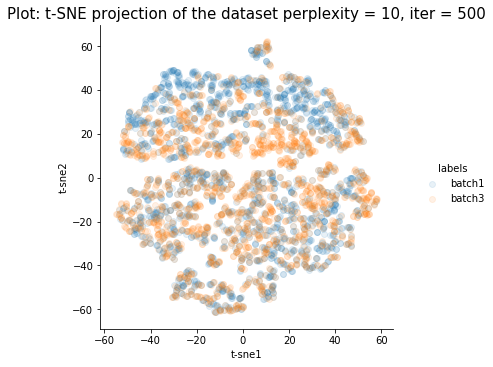

In [53]:
data_path = wd+'/Dataset5/'
df_full = pd.read_parquet(data_path+'chevrier_data_pooled_full_panels.parquet')
df_full = df_full.dropna(axis=1)
df_full = prep_for_tsne(df_full, split_by='batch')

plot_tsne(df_full, n_plots=1, pca_components=6)
plt.savefig(data_path+'/plots/tsne_both_panels_full_batch.png', bbox_inches='tight')

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.006s...
[t-SNE] Computed neighbors for 20000 samples in 0.529s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sam

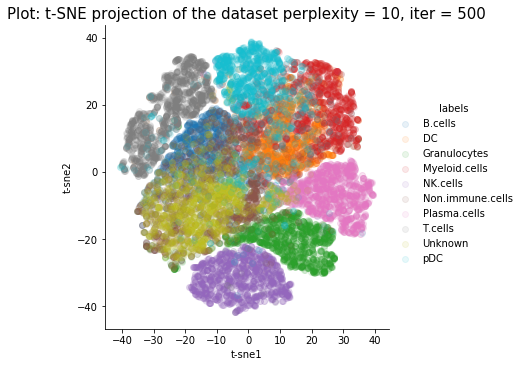

In [54]:
data_path = wd+'/Dataset5/'
df_full = pd.read_parquet(data_path+'chevrier_data_pooled_full_panels.parquet')
df_full = df_full.dropna(axis=1)
df_full = prep_for_tsne(df_full, split_by='celltype')

plot_tsne(df_full, n_plots=1, pca_components=6)
plt.savefig(data_path+'/plots/tsne_both_panels_full_celltype.png', bbox_inches='tight')

(57508, 35)
(11338, 11)
(59438, 35)
(9049, 11)
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 11338 samples in 0.003s...
[t-SNE] Computed neighbors for 11338 samples in 0.242s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11338
[t-SNE] Computed conditional probabilities for sample 2000 / 11338
[t-SNE] Computed conditional probabilities for sample 3000 / 11338
[t-SNE] Computed conditional probabilities for sample 4000 / 11338
[t-SNE] Computed conditional probabilities for sample 5000 / 11338
[t-SNE] Computed conditional probabilities for sample 6000 / 11338
[t-SNE] Computed conditional probabilities for sample 7000 / 11338
[t-SNE] Computed conditional probabilities for sample 8000 / 11338
[t-SNE] Computed conditional probabilities for sample 9000 / 11338
[t-SNE] Computed conditional probabilities for sample 10000 / 11338
[t-SNE] Computed conditional probabilities for sample 11000 / 11338
[t-SNE] Computed conditional probabilities for sample 11338 / 11338
[t-

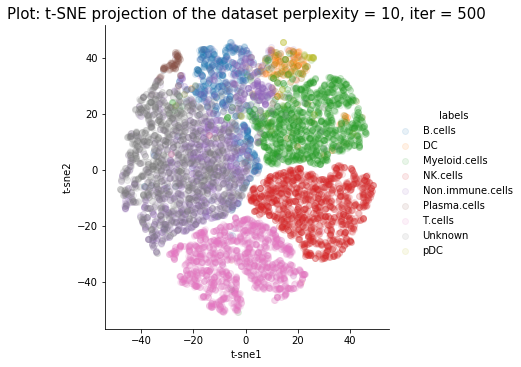

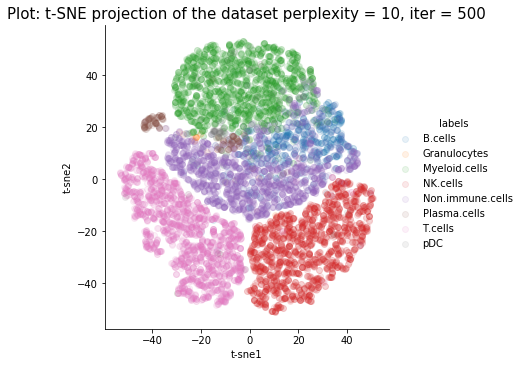

In [47]:
data_path = wd+'/Dataset5/'
df_sel = pd.read_parquet(data_path+'chevrier_data_pooled_full_panels.parquet')
df_sel = df_sel.dropna(axis=1)
df_sel = df_sel.loc[df_sel['metadata_sample'].isin(samples_selected),:]


tam_df = df_sel.loc[df_sel['metadata_panel']=='tam_panel',:]
print(tam_df.shape)
tam_df = tam_df.dropna(axis=1)
tam_df = prep_for_tsne(tam_df)
print(tam_df.shape)

tcell_df = df_sel.loc[df_sel['metadata_panel']=='tcell_panel',:]
print(tcell_df.shape)
tcell_df = tcell_df.dropna(axis=1)
tcell_df = prep_for_tsne(tcell_df)
print(tcell_df.shape)

plot_tsne(tam_df, n_plots=1, pca_components=6)
plt.savefig(data_path+'/plots/tsne_tam_panel_sel.png', bbox_inches='tight')
plot_tsne(tcell_df, n_plots=1, pca_components=6)
plt.savefig(data_path+'/plots/tsne_tcell_panel_sel.png', bbox_inches='tight')

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.001s...
[t-SNE] Computed neighbors for 4000 samples in 0.062s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.069464
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.564507
[t-SNE] KL divergence after 500 iterations: 1.472724


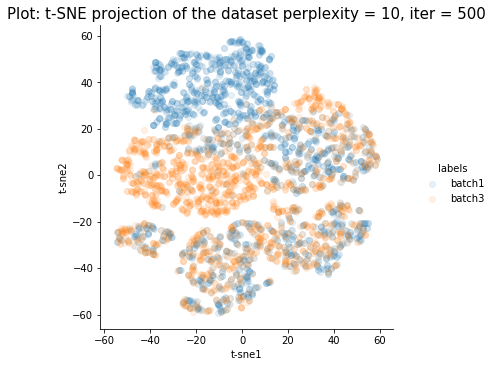

In [52]:
data_path = wd+'/Dataset5/'
df_sel = pd.read_parquet(data_path+'chevrier_data_pooled_full_panels.parquet')
df_sel = df_sel.dropna(axis=1)
df_sel = df_sel.loc[df_sel['metadata_sample'].isin(samples_selected),:]
df_sel = prep_for_tsne(df_sel, split_by='batch')

plot_tsne(df_sel, n_plots=1, pca_components=6)
plt.savefig(data_path+'/plots/tsne_both_panels_sel_batch.png', bbox_inches='tight')

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 12387 samples in 0.003s...
[t-SNE] Computed neighbors for 12387 samples in 0.288s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12387
[t-SNE] Computed conditional probabilities for sample 2000 / 12387
[t-SNE] Computed conditional probabilities for sample 3000 / 12387
[t-SNE] Computed conditional probabilities for sample 4000 / 12387
[t-SNE] Computed conditional probabilities for sample 5000 / 12387
[t-SNE] Computed conditional probabilities for sample 6000 / 12387
[t-SNE] Computed conditional probabilities for sample 7000 / 12387
[t-SNE] Computed conditional probabilities for sample 8000 / 12387
[t-SNE] Computed conditional probabilities for sample 9000 / 12387
[t-SNE] Computed conditional probabilities for sample 10000 / 12387
[t-SNE] Computed conditional probabilities for sample 11000 / 12387
[t-SNE] Computed conditional probabilities for sample 12000 / 12387
[t-SNE] Computed conditional probabilities for sam

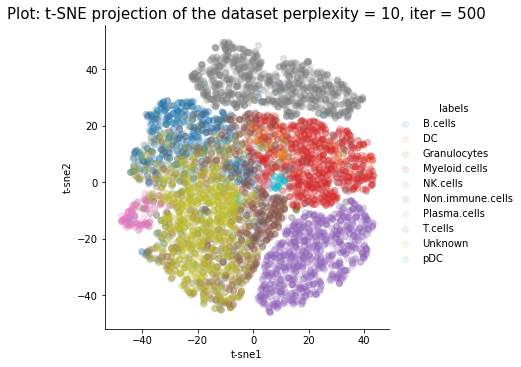

In [55]:
data_path = wd+'/Dataset5/'
df_sel = pd.read_parquet(data_path+'chevrier_data_pooled_full_panels.parquet')
df_sel = df_sel.dropna(axis=1)
df_sel = df_sel.loc[df_sel['metadata_sample'].isin(samples_selected),:]
df_sel = prep_for_tsne(df_sel, split_by='celltype')

plot_tsne(df_sel, n_plots=1, pca_components=6)
plt.savefig(data_path+'/plots/tsne_both_panels_sel_celltype.png', bbox_inches='tight')